In [ ]:
#https://medium.com/analytics-vidhya/different-ways-of-visualizing-twitter-sentiments-analysis-in-r-270d5d459603

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import random
from wordcloud import WordCloud

In [2]:
def plot_word_cloud(txt):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(txt)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

## 1. Analyse preprocessed text based on labels

### 1.0. Read and segregate

In [3]:
data_list = pd.read_csv("data/preprocessed_train_set.csv").fillna("").to_dict(orient="records")

In [4]:
pos_lst, neg_lst = [], []

In [5]:
for data in data_list:
    if data["Sentiment"] == 1:
        pos_lst.append(data["SentimentText"])
    else:
        neg_lst.append(data["SentimentText"])

### 1.1. Positive txt

In [6]:
len(pos_lst)

45123

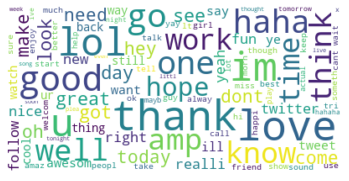

In [7]:
pos_txt = " ".join(pos_lst)
plot_word_cloud(pos_txt)

### 1.2. Negative txt

In [8]:
len(neg_lst)

34875

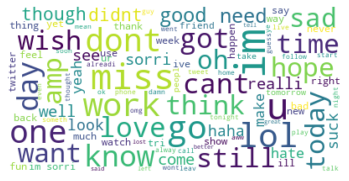

In [9]:
neg_txt = " ".join(neg_lst)
plot_word_cloud(neg_txt)

#### We see common words in both word clouds

## 2. Analyse Feature Dictionary based on positive/negative

### 2.0. Read and segregate and filter high occurences only

In [10]:
with open("data/feature_dict.pkl","rb") as in_file:
    feature_dict = pkl.load(in_file)

In [11]:
feature_df = pd.DataFrame.from_dict(feature_dict, orient = "index")

In [12]:
pure_neg_dict = feature_df[(feature_df["pos_freq"]==0)&(feature_df["neg_freq"]>5)].to_dict(orient="index")
pure_pos_dict = feature_df[feature_df["neg_freq"]==0].to_dict(orient="index")
mixed_words = feature_df[(feature_df["pos_freq"]!=0)&(feature_df["neg_freq"]!=0)]

### 2.1. Positive txt

In [13]:
percentile_99 = feature_df[feature_df["neg_freq"]==0].quantile(0.99)["pos_freq"]

In [14]:
pos_lst = []
for word,freq in pure_pos_dict.items():
    if freq["pos_freq"] > percentile_99:
        pos_lst.extend([word]*freq["pos_freq"])
len(pos_lst)

1060

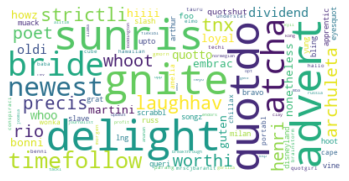

In [15]:
random.shuffle(pos_lst)
pos_txt = " ".join(pos_lst)
plot_word_cloud(pos_txt)

### 2.2. Negative txt

In [16]:
neg_lst = []
for word,freq in pure_neg_dict.items():
    neg_lst.extend([word]*freq["neg_freq"])
len(neg_lst)

402

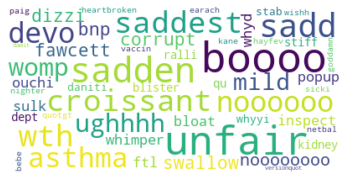

In [17]:
random.shuffle(neg_lst)
neg_txt = " ".join(neg_lst)
plot_word_cloud(neg_txt)

#### We see purely positive words are not that postive. But, certain pure negative words are.

### 2.3. Mixed txt

In [18]:
len(feature_df), len(pure_pos_dict), len(pure_neg_dict), len(mixed_words)

(44666, 19564, 51, 11114)

In [19]:
mw_99_percentile = (mixed_words["pos_freq"]-mixed_words["neg_freq"]).abs().quantile(0.99)

In [20]:
to_plot_lst = mixed_words[(mixed_words["pos_freq"]-mixed_words["neg_freq"]).abs() > mw_99_percentile].reset_index().to_dict(orient="records")

In [21]:
plot_lst = []
freq = {}
for term in to_plot_lst:
    word = term["index"]
    if term["pos_freq"] > term["neg_freq"]:
        freq[word] = "pos_freq"
        plot_lst.extend([word]*term["pos_freq"])
    else:
        freq[word] = "neg_freq"
        plot_lst.extend([word]*term["neg_freq"])
len(plot_lst)

108041

In [22]:
random.shuffle(plot_lst)
plot_txt = " ".join(plot_lst)

In [23]:
class MyColorFunctor():
    def __init__(self,frequencies):
        self.frequencies = frequencies
    
    def __call__(self,word,font_size,position,orientation,random_state=None,**kwargs):
        return "red" if self.frequencies[word]=="pos_freq" else "black"

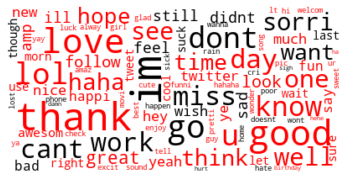

In [24]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",color_func=MyColorFunctor(freq)).generate(plot_txt)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### The above word cloud is a good mixture of positive and negative words